In [1]:
#Load up the algorithms we are going to need.
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.

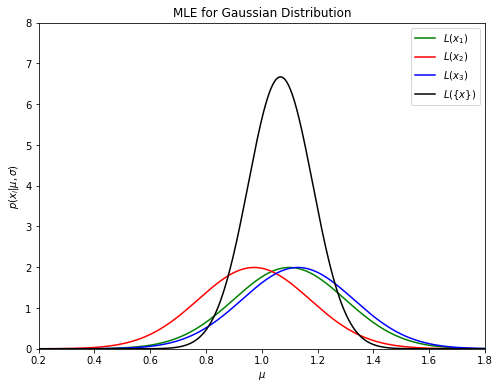

In [2]:
# N = 3 case, same as the example did in class?
N = 3
mu = 1.0
sigma = 0.2 
np.random.seed(42)
sample = norm(mu,sigma).rvs(N)

# create grid to evaluate pdf
muGrid = np.linspace(0,2,1000)

# calcuate likelihood
L1 = norm.pdf(muGrid,loc=sample[0],scale=0.2)
L2 = norm.pdf(muGrid,loc=sample[1],scale=0.2)
L3 = norm.pdf(muGrid,loc=sample[2],scale=0.2)
L = L1*L2*L3

# plot the pdf of individual gaussian and the overall likelihood
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

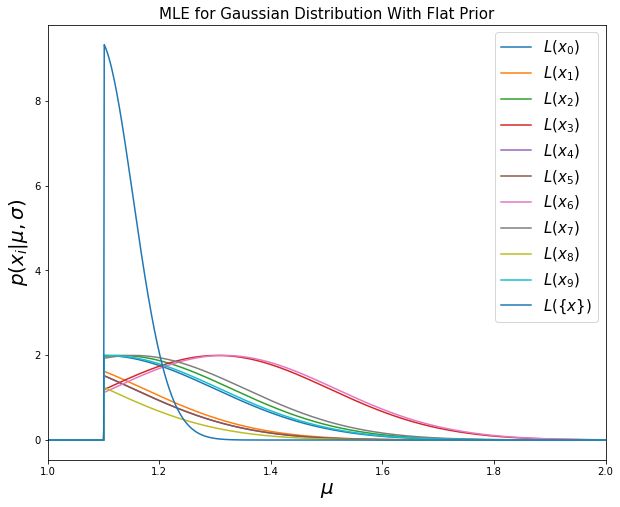

In [3]:
# N = 10 case, set a flat prior
N = 10
mu = 1.0
sigma = 0.2 
np.random.seed(42)
sample = norm(mu,sigma).rvs(N)

# generate prior distribution
prior = np.ones(2000)
prior[0:1101] = 0
# create grid to evaluate pdf
muGrid = np.linspace(0,2,2000)

Post = 1 # overall likelihood
Posts = [] # list to hold all 10 gaussians

# loop over 10 different mu, store gaussian pdf to Posts, and multiply 
# individual gaussian to give the likelihood
for i in range(10):
    Posts.append(norm.pdf(muGrid,loc=sample[i],scale=0.2)*prior)
    Post*= Posts[i]

# plot the pdf of individual gaussian and the overall likelihood
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(10):
    plt.plot(muGrid, Posts[i], label='$L(x_{})$'.format(i))

#Scaled for the sake of display
plt.plot(muGrid, Post/10, label='$L(\{x\})$') 

plt.xlim(1, 2)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel(r'$p(x_i|\mu,\sigma)$', fontsize=20)
plt.title('MLE for Gaussian Distribution With Flat Prior', fontsize=15)
plt.legend(fontsize=15)

## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

In [4]:
# Initiate states, 1 for clear and 0 for cloudy
from numpy.random import binomial
# probabilities for tomorrow is going to be clear
clear_prob = 0.9 # today is clear
cloud_prob = 0.5 # today is cloudy

def get_weather_prob(start, days):
    """
        Args:
            start(int): Starting day weather.
            days(int): Total number of days to simulate
            
        Returns:
            States: Numpy array holding the weather for each day
    """

    # Instaniate the array holding the weather, and assign start to first value
    states = np.zeros(days)
    states[0] = start
    
    # array holding prob
    probs = np.zeros_like(states)
    probs[0] = start
    
    for i in range(days-1):
        if states[i] == 0:
            states[i+1] = binomial(1, cloud_prob)
            probs[i+1] = np.sum(states)/(i+2) 
        elif states[i] == 1:
            states[i+1] = binomial(1, clear_prob)
            probs[i+1] = np.sum(states)/(i+2) 
        else:
            print ('Not zero or one!')
            break
            
    return probs            

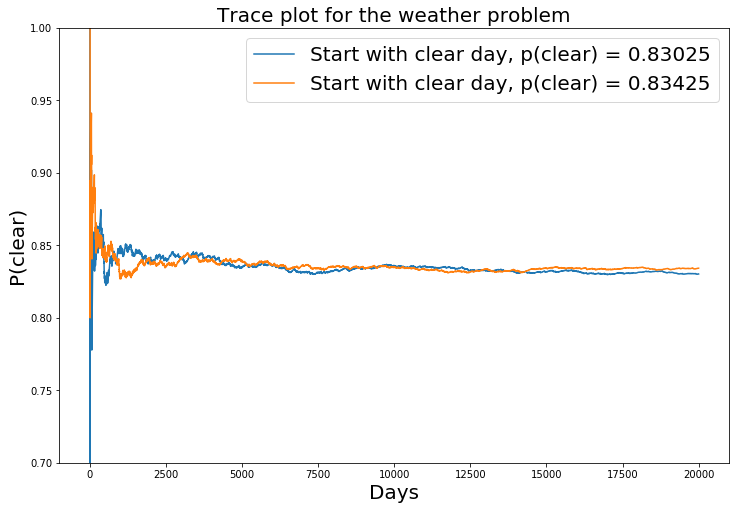

In [5]:
# Produce trace plot for a starting clear day
np.random.seed(42)
trace_clear = get_weather_prob(1, 20000)
trace_cloud = get_weather_prob(1, 20000)
days = np.array(range(20000))

# plot the trace
fig, ax = plt.subplots(figsize=(12,8))
_ = plt.plot(days+1, trace_clear, label='Start with clear day, p(clear) = {}'.format(trace_clear[-1]))
_ = plt.plot(days+1, trace_cloud, label='Start with clear day, p(clear) = {}'.format(trace_cloud[-1]))

plt.xlabel('Days', fontsize=20)
plt.ylabel('P(clear)', fontsize=20)
plt.title('Trace plot for the weather problem', fontsize=20)

plt.ylim(0.7,1)
plt.legend(fontsize=20)

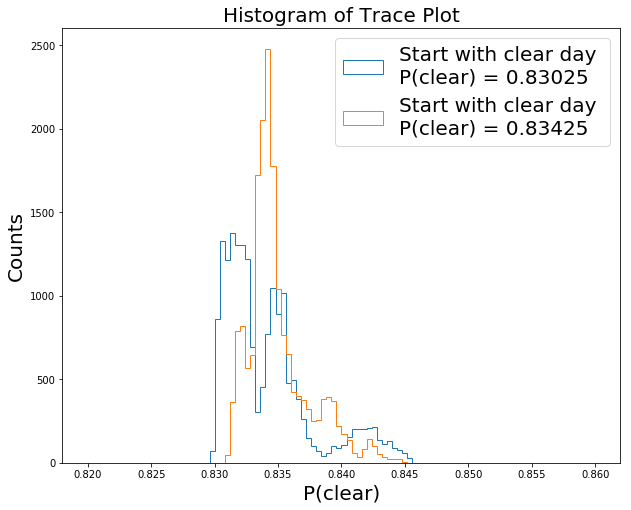

In [6]:
# plot the hist
from astroML.plotting import hist
fig = plt.figure(figsize=(10, 8))

# take out first 2000 steps
_ = plt.hist(trace_clear[2000:], histtype='step',bins=100,  range=(0.82, 0.86), \
             label='Start with clear day \nP(clear) = {}'.format(trace_clear[-1]))
_ = plt.hist(trace_cloud[2000:], histtype='step',bins=100,  range=(0.82, 0.86), \
             label='Start with clear day \nP(clear) = {}'.format(trace_cloud[-1]))

plt.xlabel('P(clear)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Histogram of Trace Plot', fontsize=20)
plt.legend(fontsize=20)

In [10]:
print('If start with a clear day!')
print('The probability of getting a clear day for day 19999 is {}, for day 20000 is {}'.format(trace_clear[-2], trace_clear[-1]))
print('If start with a cloudy day!')
print('The probability of getting a clear day for day 19999 is {}, for day 20000 is {}'.format(trace_cloud[-2], trace_cloud[-1]))

If start with a clear day!
The probability of getting a clear day for day 19999 is 0.8302415120756038, for day 20000 is 0.83025
If start with a cloudy day!
The probability of getting a clear day for day 19999 is 0.8342417120856043, for day 20000 is 0.83425
